# 颜色矩 [ ]

颜色矩是一种简单有效的颜色特征表示方法，
1. 一阶矩(均值,mean) ,表征该颜色通道的平均响应强度，
2. 二阶矩(方差, variance),表示该颜色通道的响应方差
3. 三阶矩(斜度,skewness)等,表征该颜色通道数据分布的偏移度
由于颜色信息主要分布于低阶矩中，所以用一阶矩，二阶矩和三阶矩足以表达图像的颜色分布，

In [18]:
from PIL import Image
import numpy as np
import os
import cv2
from matplotlib import pyplot as plt

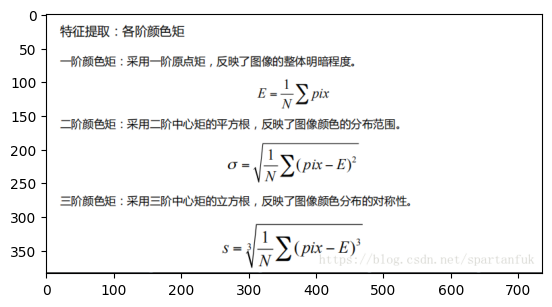

In [19]:
image = cv2.imread('./image/颜色矩.png')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [20]:
def color_moments(filename):
    img = cv2.imread(filename)
    if img is None:
        return
    
#     color_matrix = np.array(img)
#     print('颜色矩阵为：',color_matrix)
#     output_image = Image.fromarray(color_matrix)
#     output_image.save('output.jpg')
    
    # Convert BGR to RGB colorspace
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Split the channels - r,g,b
    r, g, b = cv2.split(rgb)
#     print(r.shape)

    # Initialize the color feature
    color_feature = []
    # N = r.shape[0] * r.shape[1]
    # The first central moment - average，
    r_mean = np.mean(r)  # np.sum(r)/float(N)
    g_mean = np.mean(g)  # np.sum(g)/float(N)
    b_mean = np.mean(b)  # np.sum(b)/float(N)
    color_feature.append([r_mean, g_mean, b_mean])
    
    # The second central moment - standard deviation，
    r_std = np.std(r)  # np.sqrt(np.mean(abs(r - r.mean())**2))
    g_std = np.std(g)  # np.sqrt(np.mean(abs(g - g.mean())**2))
    b_std = np.std(b)  # np.sqrt(np.mean(abs(b - b.mean())**2))
    color_feature.append([r_std, g_std, b_std])
    
    # The third central moment - the third root of the skewness 
    r_skewness = np.mean(abs(r - r.mean())**3)
    g_skewness = np.mean(abs(g - g.mean())**3)
    b_skewness = np.mean(abs(b - b.mean())**3)
    r_thirdMoment = r_skewness**(1./3)
    g_thirdMoment = g_skewness**(1./3)
    b_thirdMoment = b_skewness**(1./3)
    color_feature.append([r_thirdMoment, g_thirdMoment, b_thirdMoment])
    return color_feature

#     print('颜色特征矩阵：\n',color_feature)

In [21]:
color_moments('./image/000.jpg') #从实验结果可以看出此图像的  B通道数据的均值最高，其次是G通道的


[[133.6069567017104, 134.16371186181843, 136.14275997460135],
 [38.86835175247709, 39.07833910671361, 41.65599655776931],
 [45.1494042634936, 44.876271470228424, 47.942871423216985]]

In [23]:
color_moments('./image/001.jpg')

[[143.47327715084876, 143.29746174125515, 144.76984973797582],
 [33.84492943224424, 34.35378033425707, 36.98269995032058],
 [38.7574948984803, 40.062401448003264, 42.53638935673736]]

In [24]:
color_moments('./image/0049.jpg')

[[152.21150615676441, 150.7505144032922, 152.7493911554784],
 [40.49261103189059, 42.16100888817839, 39.03828339669536],
 [46.985729431986, 47.39194003875839, 44.11458843193999]]

In [25]:

color_moments('./image/0051.jpg')

[[122.90520712770062, 120.4067885159465, 115.51739928948045],
 [33.34611864016885, 33.21503277170774, 31.885790693083592],
 [38.78645493133065, 39.1302794966679, 37.50759803711559]]

# 颜色直方图 📊

cv2.calcHist(images,channels,mask,histSize,ranges)
1. images: 原图像图像格式为 uint8 或 ﬂoat32。当传入函数时应 用中括号 [] 括来例如[img]
2. channels: 同样用[]来告函数我们统幅图像的直方图。灰度图 [0],彩色图像 [0][1][2] 它们分别对应着 BGR。
3. mask: 掩模图像。 统计整幅图像的直方图就把它为 None。但是如果你想统计图像某一分的直方图的你就制作一个掩模图像并使用它。
4. histSize:BIN 的数目。[]
BINS ：上面的直方图显示了每个像素值的像素数，即从0到255。即需要256个值才能显示上述直方图。
但是如果不需要单独查找所有像素值的像素数，而是在像素值间隔内查找像素数，该怎么办？
例如，需要找到介于 0 到 15 之间的像素数，然后是 16 到 31、...、240 到 255，则只需要 16 个值来表示直方图。
因此，只需将整个直方图拆分为 16 个子部分，每个子部分的值就是其中所有像素计数的总和。
这每个子部分都称为"BIN"。在第一种情况下，条柱数为256（每个像素一个），而在第二种情况下，它只有16。
5. ranges: 像素值范围常为 [0,256]


In [49]:
from matplotlib import pyplot as plt
import numpy as np
import argparse
import cv2

In [50]:
# load the image and show it args["image"]                           
image = cv2.imread("./image/000.jpg")  # 注意不在同一目录下的文件目标读取方式
print(image.shape)                     # (864, 1152, 3)
print(image.size)                      # 2985984
b,g,r = image[6,40]                    # 查看某个像素点的颜色组成
print(b,g,r)                         # 255 255 255
image[6,10] = (0,0,0)                  # 改变某一个像素点的颜色组成，直接赋值即可
# cv2.imshow("image",image)                # 参数给定需要先给一个题目，再给输出图片名称
# cv2.waitKey(0)                       # 等待，要不只显示一下就关闭窗口了
# cv2.destroyAllWindows()

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('image')

(864, 1152, 3)
2985984
215 204 206


Text(0.5, 1.0, 'image')

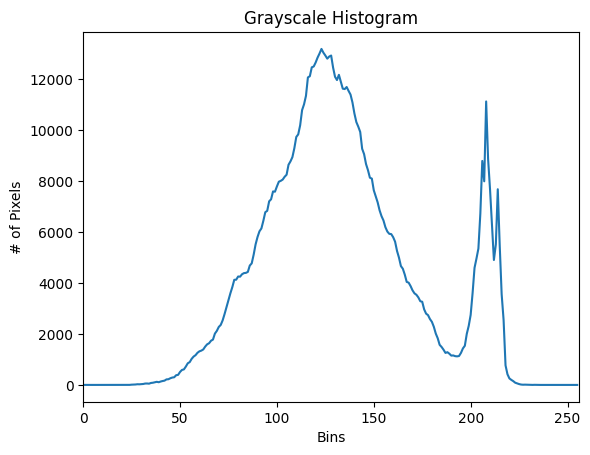

In [51]:
# convert the image to grayscale and create a histogram
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# cv2.imshow("gray", gray)

# plt.imshow(gray)
# plt.title('gray')

hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
# plt.figure() #创建新的图形窗口
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

[array([[217, 217, 217, ..., 127, 127, 129],
       [217, 217, 217, ..., 126, 126, 127],
       [217, 217, 217, ..., 126, 125, 126],
       ...,
       [107, 112, 115, ..., 145, 138, 136],
       [111, 113, 111, ..., 138, 135, 131],
       [113, 113, 111, ..., 131, 135, 135]], dtype=uint8), array([[204, 204, 204, ..., 126, 127, 129],
       [204, 204, 204, ..., 125, 126, 127],
       [204, 204, 204, ..., 125, 125, 126],
       ...,
       [118, 123, 126, ..., 146, 141, 139],
       [122, 124, 122, ..., 139, 138, 134],
       [124, 124, 122, ..., 132, 138, 138]], dtype=uint8), array([[206, 206, 206, ..., 135, 133, 135],
       [206, 206, 206, ..., 134, 132, 133],
       [206, 206, 206, ..., 134, 131, 132],
       ...,
       [ 98, 103, 106, ..., 130, 126, 124],
       [102, 104, 102, ..., 123, 123, 119],
       [104, 104, 102, ..., 116, 123, 123]], dtype=uint8)]


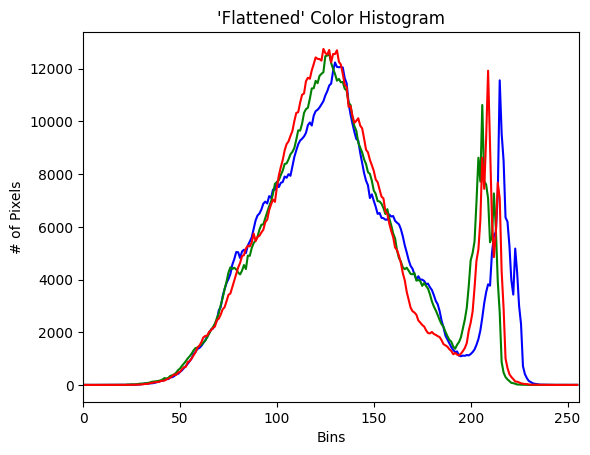

flattened feature vector size: 768


In [52]:
# grab the image channels, initialize the tuple of colors,
# the figure and the flattened feature vector
chans = cv2.split(image)
print(chans)
colors = ("b", "g", "r")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
features = []

# loop over the image channels
for (chan, color) in zip(chans, colors):
    # create a histogram for the current channel and
    # concatenate the resulting histograms for each
    # channel
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    features.extend(hist)

    # plot the histogram
    plt.plot(hist, color = color)
    plt.xlim([0, 256])
plt.show()

# here we are simply showing the dimensionality of the
# flattened color histogram 256 bins for each channel
# x 3 channels = 768 total values -- in practice, we would
# normally not use 256 bins for each channel, a choice
# between 32-96 bins are normally used, but this tends
# to be application dependent
print("flattened feature vector size: %d" % (np.array(features).flatten().shape))

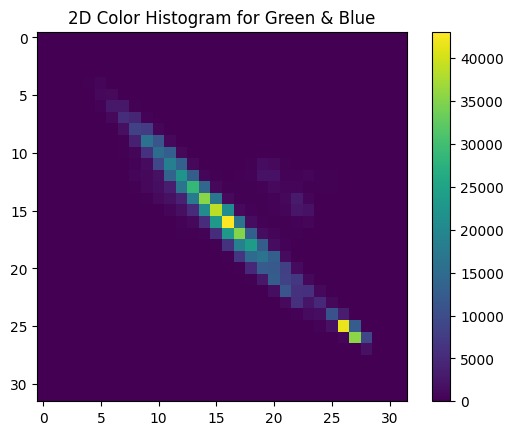

In [60]:
# let's move on to 2D histograms -- I am reducing the
# number of bins in the histogram from 256 to 32 so we
# can better visualize the results

# plot a 2D color histogram for green and blue
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None, [32, 32], [0, 256, 0, 256])
plt.title("2D Color Histogram for Green & Blue")
plt.colorbar(plt.imshow(hist, interpolation = "nearest"))
plt.show()

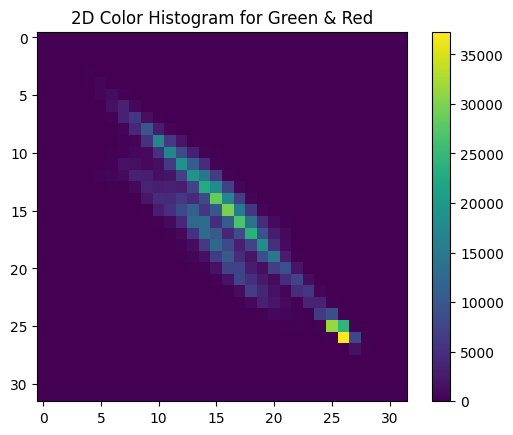

In [61]:
# plot a 2D color histogram for green and red
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
plt.title("2D Color Histogram for Green & Red")
plt.colorbar(plt.imshow(hist, interpolation = "nearest"))
plt.show()

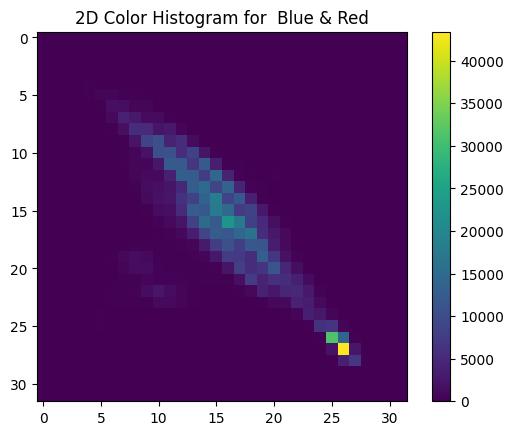

In [62]:
# plot a 2D color histogram for blue and red
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
plt.title("2D Color Histogram for  Blue & Red")
plt.colorbar(plt.imshow(hist, interpolation = "nearest"))
plt.show()

In [63]:
# finally, let's examine the dimensionality of one of
# the 2D histograms
print ("2D histogram shape: %s, with %d values" % (hist.shape, hist.flatten().shape[0]))

# our 2D histogram could only take into account 2 out
# of the 3 channels in the image so now let's build a
# 3D color histogram (utilizing all channels) with 8 bins
# in each direction -- we can't plot the 3D histogram, but
# the theory is exactly like that of a 2D histogram, so
# we'll just show the shape of the histogram
hist = cv2.calcHist([image], [0, 1, 2],None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
print ("3D histogram shape: %s, with %d values" % (hist.shape, hist.flatten().shape[0]))

# show the figures and wait for a keypress
# plt.show()
# cv2.waitKey(0)
# cv2.destroyAllWindows()

2D histogram shape: (32, 32), with 1024 values
3D histogram shape: (8, 8, 8), with 512 values


# 纹理特征

不同于灰度、颜色等图像特征，纹理通过像素及其周围空间邻域的灰度分布来表现，即局部纹理信息。另外，局部纹理信息不同程度上的重复性，就是全局纹理信息。
纹理特征体现全局特征的性质的同时，它也描述了图像或图像区域所对应景物的表面性质。但由于纹理只是一种物体表面的特性，并不能完全反映出物体的本质属性，所以仅仅利用纹理特征是无法获得高层次图像内容的。
1. 与颜色特征不同，纹理特征不是基于像素点的特征，它需要在包含多个像素点的区域中进行统计计算。
2. 在模式匹配中，这种区域性的特征具有较大的优越性，不会由于局部的偏差而无法匹配成功。
3. 粗细、疏密相差不大时，

优点：
- 包含多个像素点的区域中进行统计计算
- 常具有旋转不变性
- 对于噪声有较强的抵抗能力

缺点：
- 当图像的分辨率变化的时候，所计算出来的纹理可能会有较大偏差
- 有可能受到光照、反射情况的影响
- 从2-D图像中反映出来的纹理不一定是3-D物体表面真实的纹理

## 灰度共生矩阵（ grey level co-occurrence matrix，GLCM）用来描述图像灰度分布的均匀程度和纹理的粗细程度。
就是通过计算灰度图像得到它的共生矩阵，然后透过计算该共生矩阵得到矩阵的部分特征值，来分别代表图像的某些纹理特征（纹理的定义仍是难点）。灰度共生矩阵能反映图像灰度关于方向、相邻间隔、变化幅度等综合信息，它是分析图像的局部模式和它们排列规则的基础。


In [3]:
# coding: utf-8

import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import data
from PIL import Image

In [4]:
def fast_glcm(img, vmin=0, vmax=255, nbit=8, kernel_size=5):
    mi, ma = vmin, vmax
    ks = kernel_size
    h,w = img.shape

    # digitize
    bins = np.linspace(mi, ma+1, nbit+1)
    gl1 = np.digitize(img, bins) - 1
    gl2 = np.append(gl1[:,1:], gl1[:,-1:], axis=1)

    # make glcm
    glcm = np.zeros((nbit, nbit, h, w), dtype=np.uint8)
    for i in range(nbit):
        for j in range(nbit):
            mask = ((gl1==i) & (gl2==j))
            glcm[i,j, mask] = 1

    kernel = np.ones((ks, ks), dtype=np.uint8)
    for i in range(nbit):
        for j in range(nbit):
            glcm[i,j] = cv2.filter2D(glcm[i,j], -1, kernel)

    glcm = glcm.astype(np.float32)

    return glcm

def fast_glcm_mean(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    calc glcm mean
    '''
    h,w = img.shape
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    mean = np.zeros((h,w), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            mean += glcm[i,j] * i / (nbit)**2

    return mean


def fast_glcm_std(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    calc glcm std
    '''
    h,w = img.shape
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    mean = np.zeros((h,w), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            mean += glcm[i,j] * i / (nbit)**2

    std2 = np.zeros((h,w), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            std2 += (glcm[i,j] * i - mean)**2

    std = np.sqrt(std2)
    return std

'''
对比度反应了图像的清晰度和纹理的沟纹深浅。
度量矩阵的值是如何分布和图像中局部变化的多少，反应了图像的清晰度和纹理的沟纹深浅。
纹理的沟纹越深，反差越大，效果清晰；反之，对比值小，则沟纹浅，效果模糊。
反应某像素值及其领域像素值亮度的对比情况，图像亮度值变化快，
换句话说纹理较深，它的对比度就越大，也就是它的纹理越清晰。

'''
def fast_glcm_contrast(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    calc glcm contrast
    '''
    h,w = img.shape
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    cont = np.zeros((h,w), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            cont += glcm[i,j] * (i-j)**2

    return cont

'''
计算对比度时，权重随矩阵元素与对角线的距离以指数方式增长，如果改为线性增长，则得到相异性。
'''
def fast_glcm_dissimilarity(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    calc glcm dissimilarity
    '''
    h,w = img.shape
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    diss = np.zeros((h,w), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            diss += glcm[i,j] * np.abs(i-j)

    return diss

'''
测量图像的局部均匀性，非均匀图像的值较低，均匀图像的值较高。
与对比度或相异性相反，同质性的权重随着元素值与对角线的距离而减小，其减小方式是指数形式的。
'''
def fast_glcm_homogeneity(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    calc glcm homogeneity
    '''
    h,w = img.shape
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    homo = np.zeros((h,w), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            homo += glcm[i,j] / (1.+(i-j)**2)

    return homo

'''
如果 GLCM 的所有值都非常接近，则 ASM 值较小； 如果矩阵元素取值差别较大，则 ASM 值较大。
当 ASM 值较大时，纹理粗，能量大； 反之，当 ASM 值小时，纹理细，能量小。
'''
def fast_glcm_ASM(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    calc glcm asm, energy
    '''
    h,w = img.shape
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    asm = np.zeros((h,w), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            asm  += glcm[i,j]**2

    ene = np.sqrt(asm)
    return asm, ene

'''
表示图像中出现次数最多的纹理特征。
'''
def fast_glcm_max(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    calc glcm max
    '''
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    max_  = np.max(glcm, axis=(0,1))
    return max_

'''
测量图像纹理的随机性（强度分布）。熵是图像包含信息量的随机性度量，表现了图像的复杂程度。
当共生矩阵中所有值均相等或者像素值表现出最大的随机性时，熵最大；因此熵值表明了图像灰度分布的复杂程度，熵值越大，图像越复杂。
表示矩阵中元素的分散程度，也表示图像纹理的复杂程度。
'''
def fast_glcm_entropy(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    calc glcm entropy
    '''
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    pnorm = glcm / np.sum(glcm, axis=(0,1)) + 1./ks**2
    ent  = np.sum(-pnorm * np.log(pnorm), axis=(0,1))
    return ent



864 1152


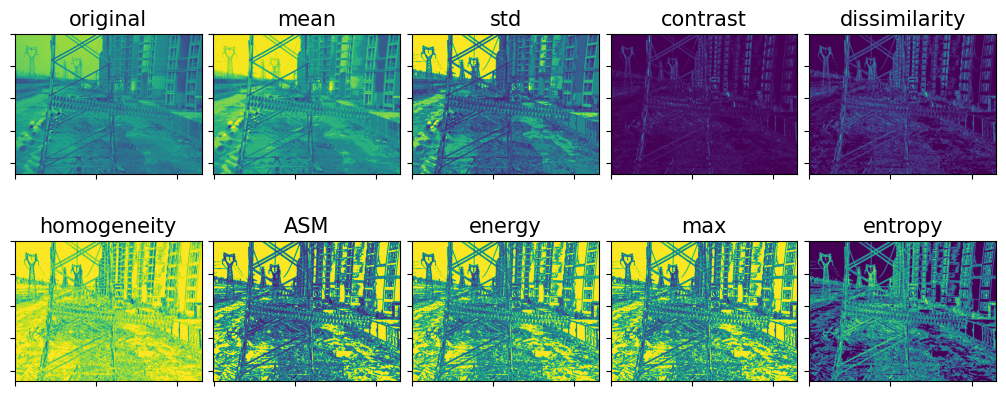

In [7]:
image = './image/000.jpg';
img = np.array(Image.open(image).convert('L'))
#img = data.camera()
h,w = img.shape
print(h,w)

mean = fast_glcm_mean(img)
std = fast_glcm_std(img)
cont = fast_glcm_contrast(img)
diss = fast_glcm_dissimilarity(img)
homo = fast_glcm_homogeneity(img)
asm, ene = fast_glcm_ASM(img)
max_ = fast_glcm_max(img)
ent = fast_glcm_entropy(img)

plt.figure(figsize=(10,4.5))
fs = 15
    
plt.subplot(2,5,1)
plt.tick_params(labelbottom=False, labelleft=False)
plt.imshow(img)
plt.title('original', fontsize=fs)

plt.subplot(2,5,2)
plt.tick_params(labelbottom=False, labelleft=False)
plt.imshow(mean)
plt.title('mean', fontsize=fs)

plt.subplot(2,5,3)
plt.tick_params(labelbottom=False, labelleft=False)
plt.imshow(std)
plt.title('std', fontsize=fs)

plt.subplot(2,5,4)
plt.tick_params(labelbottom=False, labelleft=False)
plt.imshow(cont)
plt.title('contrast', fontsize=fs)

plt.subplot(2,5,5)
plt.tick_params(labelbottom=False, labelleft=False)
plt.imshow(diss)
plt.title('dissimilarity', fontsize=fs)

plt.subplot(2,5,6)
plt.tick_params(labelbottom=False, labelleft=False)
plt.imshow(homo)
plt.title('homogeneity', fontsize=fs)

plt.subplot(2,5,7)
plt.tick_params(labelbottom=False, labelleft=False)
plt.imshow(asm)
plt.title('ASM', fontsize=fs)

plt.subplot(2,5,8)
plt.tick_params(labelbottom=False, labelleft=False)
plt.imshow(ene)
plt.title('energy', fontsize=fs)

plt.subplot(2,5,9)
plt.tick_params(labelbottom=False, labelleft=False)
plt.imshow(max_)
plt.title('max', fontsize=fs)

plt.subplot(2,5,10)
plt.tick_params(labelbottom=False, labelleft=False)
plt.imshow(ent)
plt.title('entropy', fontsize=fs)

plt.tight_layout(pad=0.5)
plt.savefig('./image/GLCM.jpg')
plt.show()

# LBP （Local Binary Pattern）
LBP只是【描述图像局部特征的一个数字】，每个像素值都可以计算出一个可以LBP特征值，可以可视化，具有灰度不变性和旋转不变性等特性。
1. 原始的LBP算子定义在像素3*3的邻域内，以邻域中心像素为阈值，相邻的8个像素的灰度值与邻域中心的像素值进行比较，若周围像素大于中心像素值，则该像素点的位置被标记为1，否则为0。
2. 这样，3*3邻域内的8个点经过比较可产生8位二进制数，将这8位二进制数依次排列形成一个二进制数字，这个二进制数字就是中心像素的LBP值，LBP值共有2^8种可能，因此LBP值有256种。中心像素的LBP值反映了该像素周围区域的纹理信息。  
该过程用图像表示如下所示：

注：计算LBP特征的图像必须是灰度图，如果是彩色图，需要先转换成灰度图。
- 能很好的提取边缘特征

In [11]:
image = cv2.imread('./image/LBP.png')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# 十进制下的数字124就是当前中心像素值的LBP值，从某种程度上描述了当前中心像素的特征。

In [8]:
import numpy as np
import cv2
from PIL import Image
from pylab import *
import matplotlib.pyplot as plt

等价模式类
- 一个LBP特征有多种不同的二进制形式；对于半径R的圆形区域内含有P个采样点的LBP算子将会产生2^p种模式，而过多的模式很不利于纹理的提取、分类、识别和存储，
因此需要对原始的LBP模式进行降维，使得数据量减少的情况下能最好的表示图像的信息。
- Ojala提出采用“等价模式”进行降维，即当某个LBP所对应的循环二进制数从0到1或从1到0最多有两次跳变时，该LBP所对应的二进制就称为一个等价模式类。如00000000(0次跳变)，00000111(只含一次从0到1的跳变)，10001111(先由1跳到0，再由0跳到1，共两次跳变)都是等价模式类；
- 除等价模式类以外的模式都归为另一类，称为混合模式类，例如10010111(共四次跳变)。通过这样的改进，二进制模式的种类大大减少，而不会丢失任何信息。模式数量由原来的2^p种减少为 P ( P-1)+2种，其中P表示邻域集内的采样点数。
    - 对于3×3邻域内8个采样点来说，二进制模式由原始的256种减少为58种，即：它把值分为59类，58个uniform pattern为一类，其它的所有值为第59类。这样直方图从原来的256维变成59维。这使得特征向量的维数更少，并且可以减少高频噪声带来的影响。

In [9]:
class LBP:
    def __init__(self):
        #revolve_map为旋转不变模式的36种特征值从小到大进行序列化编号得到的字典
        self.revolve_map={0:0,1:1,3:2,5:3,7:4,9:5,11:6,13:7,15:8,17:9,19:10,21:11,23:12,
                          25:13,27:14,29:15,31:16,37:17,39:18,43:19,45:20,47:21,51:22,53:23,55:24,
                          59:25,61:26,63:27,85:28,87:29,91:30,95:31,111:32,119:33,127:34,255:35}
       
        #uniform_map为等价模式的58种特征值从小到大进行序列化编号得到的字典
        self.uniform_map={0:0,1:1,2:2,3:3,4:4,6:5,7:6,8:7,12:8,
                          14:9,15:10,16:11,24:12,28:13,30:14,31:15,32:16,
                          48:17,56:18,60:19,62:20,63:21,64:22,96:23,112:24,
                          120:25,124:26,126:27,127:28,128:29,129:30,131:31,135:32,
                          143:33,159:34,191:35,192:36,193:37,195:38,199:39,207:40,
                          223:41,224:42,225:43,227:44,231:45,239:46,240:47,241:48,
                          243:49,247:50,248:51,249:52,251:53,252:54,253:55,254:56,
                          255:57}


     #将图像载入，并转化为灰度图，获取图像灰度图的像素信息   
    def describe(self,image):
        image_array=np.array(Image.open(image).convert('L'))
        return image_array

    #图像的LBP原始特征计算算法：将图像指定位置的像素与周围8个像素比较
    #比中心像素大的点赋值为1，比中心像素小的赋值为0，返回得到的二进制序列
    def calute_basic_lbp(self,image_array,i,j):
        sum=[]
        if image_array[i-1,j-1]>image_array[i,j]:
            sum.append(1)
        else:
            sum.append(0)
        if image_array[i-1,j]>image_array[i,j]:
            sum.append(1)
        else:
            sum.append(0)
        if image_array[i-1,j+1]>image_array[i,j]:
            sum.append(1)
        else:
            sum.append(0)
        if image_array[i,j-1]>image_array[i,j]:
            sum.append(1)
        else:
            sum.append(0)
        if image_array[i,j+1]>image_array[i,j]:
            sum.append(1)
        else:
            sum.append(0)
        if image_array[i+1,j-1]>image_array[i,j]:
            sum.append(1)
        else:
            sum.append(0)
        if image_array[i+1,j]>image_array[i,j]:
            sum.append(1)
        else:
            sum.append(0)
        if image_array[i+1,j+1]>image_array[i,j]:
            sum.append(1)
        else:
            sum.append(0)
        return sum

    #获取二进制序列进行不断环形旋转得到新的二进制序列的最小十进制值
    def get_min_for_revolve(self,arr): 
        values=[]
        circle=arr
        circle.extend(arr)
        for i in range(0,8):
            j=0
            sum=0
            bit_num=0
            while j<8:
                sum+=circle[i+j]<<bit_num
                bit_num+=1
                j+=1
            values.append(sum)
        return min(values)

    #获取值r的二进制中1的位数
    def calc_sum(self,r):
        num=0
        while(r):
            r&=(r-1)
            num+=1
        return num

    #获取图像的LBP原始模式特征
    def lbp_basic(self,image_array):
        basic_array=np.zeros(image_array.shape, np.uint8)
        width=image_array.shape[0]
        height=image_array.shape[1]
        for i in range(1,width-1):
            for j in range(1,height-1):
                sum=self.calute_basic_lbp(image_array,i,j)
                bit_num=0
                result=0
                for s in sum:
                    result+=s<<bit_num
                    bit_num+=1
                basic_array[i,j]=result
        return basic_array

    #获取图像的LBP旋转不变模式特征
    def lbp_revolve(self,image_array):
        revolve_array=np.zeros(image_array.shape, np.uint8)
        width=image_array.shape[0]
        height=image_array.shape[1]
        for i in range(1,width-1):
            for j in range(1,height-1):
                sum=self.calute_basic_lbp(image_array,i,j)
                revolve_key=self.get_min_for_revolve(sum)
                revolve_array[i,j]=self.revolve_map[revolve_key]
        return revolve_array

    #获取图像的LBP等价模式特征
    def lbp_uniform(self,image_array):
        uniform_array=np.zeros(image_array.shape, np.uint8)
        basic_array=self.lbp_basic(image_array)
        width=image_array.shape[0]
        height=image_array.shape[1]

        for i in range(1,width-1):
            for j in range(1,height-1):
                 k= basic_array[i,j]<<1
                 if k>255:
                     k=k-255
                 xor=basic_array[i,j]^k
                 num=self.calc_sum(xor)
                 if num<=2:
                     uniform_array[i,j]=self.uniform_map[basic_array[i,j]]
                 else:
                     uniform_array[i,j]=58
        return uniform_array

    #获取图像的LBP旋转不变等价模式特征
    def lbp_revolve_uniform(self,image_array):
        uniform_revolve_array=np.zeros(image_array.shape, np.uint8)
        basic_array=self.lbp_basic(image_array)
        width=image_array.shape[0]
        height=image_array.shape[1]
        for i in range(1,width-1):
            for j in range(1,height-1):
                 k= basic_array[i,j]<<1
                 if k>255:
                     k=k-255
                 xor=basic_array[i,j]^k
                 num=self.calc_sum(xor)
                 if num<=2:
                     uniform_revolve_array[i,j]=self.calc_sum(basic_array[i,j])
                 else:
                     uniform_revolve_array[i,j]=9
        return uniform_revolve_array

    #绘制指定维数和范围的图像灰度归一化统计直方图
    def show_hist(self,img_array,im_bins,im_range):
        hist = cv2.calcHist([img_array],[0],None,im_bins,im_range)
        hist = cv2.normalize(hist,None).flatten()
        plt.plot(hist,color = 'r')
        plt.xlim(im_range)
        plt.show()

    #绘制图像原始LBP特征的归一化统计直方图  
    def show_basic_hist(self,img_array):
        self.show_hist(img_array,[256],[0,256])
        plt.title('原始LBP')

    #绘制图像旋转不变LBP特征的归一化统计直方图     
    def show_revolve_hist(self,img_array):
        self.show_hist(img_array,[36],[0,36])

    #绘制图像等价模式LBP特征的归一化统计直方图     
    def show_uniform_hist(self,img_array):
        self.show_hist(img_array,[60],[0,60])

    #绘制图像旋转不变等价模式LBP特征的归一化统计直方图     
    def show_revolve_uniform_hist(self,img_array):
        self.show_hist(img_array,[10],[0,10])

    #显示图像
    def show_image(self,image_array):
        plt.imshow(image_array)
        plt.title('Image')


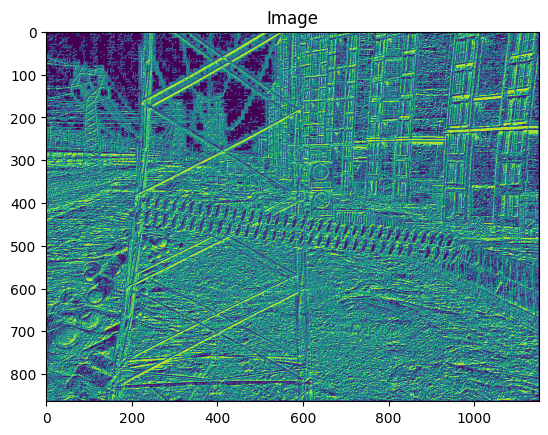

In [10]:
if __name__ == '__main__':
    image = r"/Users/rl/Documents/PhD student/Untitled Folder/image/000.jpg";
    lbp=LBP()
    image_array=lbp.describe(image)
    
    #获取图像原始LBP特征，并显示其统计直方图与特征图像
    basic_array=lbp.lbp_basic(image_array)
    lbp.show_basic_hist(basic_array)
    lbp.show_image(basic_array)

    #获取图像旋转不变LBP特征，并显示其统计直方图与特征图像
    #revolve_array=lbp.lbp_revolve(image_array)
    #lbp.show_revolve_hist(revolve_array)
    #lbp.show_image(revolve_array)

    #获取图像等价模式LBP特征，并显示其统计直方图与特征图像
    #uniform_array=lbp.lbp_uniform(image_array)
    #lbp.show_uniform_hist(uniform_array)
    #lbp.show_image(uniform_array)

    #获取图像等价模式LBP特征，并显示其统计直方图与特征图像
    #resolve_uniform_array=lbp.lbp_revolve_uniform(image_array)
    #lbp.show_revolve_uniform_hist(resolve_uniform_array)
    #lbp.show_image(resolve_uniform_array)


# 边缘检测
https://mp.weixin.qq.com/s/3YE0ISVtXuME78TFH8fuUQ
1. Canny 边缘检测：
    - 对输入图像进行平滑处理，应用 Sobel 滤波器检测图像的边缘；
    - 寻找图像的强度梯度；
    - 应用非最大抑制，保留梯度方向上的局部最大像素，其余的被抑制；
        由于噪声和颜色变化导致的像素会在图像中持续存在。双阈值处理来去除低于某个阈值的像素，并保留高于某个阈值的像素以去除可能由于噪声而形成的边缘。
    - 滞后边缘跟踪；
2. OpenCV 中实现 Canny  边缘检测器
3. 基于深度学习的模型 - 整体嵌套边缘检测（HED）
    - Canny 边缘 主要关注局部变化而不是图像的语义，即它较少关注图像的内容。因此，我们得到不太准确的边缘。
    - （HED）技术是一种基于学习的端到端边缘检测系统，它使用修剪后的 VGG 类卷积神经网络来执行图像到图像的预测任务。HED 在神经网络中生成边输出。所有侧面输出都融合在一起以形成最终输出。

In [9]:
import cv2 
from skimage.metrics import mean_squared_error,peak_signal_noise_ratio,structural_similarity
import matplotlib.pyplot as plt

In [10]:
img_path = './image/000.jpg'
#Reading the image
image = cv2.imread(img_path)
(H, W) = image.shape[:2]
# convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# blur the image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
# Perform the canny operator
canny = cv2.Canny(blurred, 30, 150)

In [11]:
fig,ax =  plt.subplots(1,2,figsize=(18, 18))
ax[0].imshow(gray,cmap='gray')
ax[1].imshow(canny,cmap='gray')
ax[0].axis('off')
ax[1].axis('off')

(-0.5, 1151.5, 863.5, -0.5)

In [1]:
import cv2
import numpy as np
image = cv2.imread('./image/000.jpg')

gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

soblex = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=5)
sobley = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=5)

edage_sobel = cv2.addWeighted(soblex,0.5,sobley,0.5,0)
cv2.imwrite('sobel.jpg',edage_sobel)

True

In [12]:
#This class helps in cropping the specified coordinated in the function
class CropLayer(object):
    def __init__(self, params, blobs):
        # initialize our starting and ending (x, y)-coordinates of
        self.startX = 0
        self.startY = 0
        self.endX = 0
        self.endY = 0
    def getMemoryShapes(self, inputs):
        (inputShape, targetShape) = (inputs[0], inputs[1])
        (batchSize, numChannels) = (inputShape[0], inputShape[1])
        (H, W) = (targetShape[2], targetShape[3])
        # compute the starting and ending crop coordinates
        self.startX = int((inputShape[3] - targetShape[3]) / 2)
        self.startY = int((inputShape[2] - targetShape[2]) / 2)
        self.endX = self.startX + W
        self.endY = self.startY + H
        # return the shape of the volume (we'll perform the actual
        # crop during the forward pass
        return [[batchSize, numChannels, H, W]]
    def forward(self, inputs):
        return [inputs[0][:, :, self.startY:self.endY,self.startX:self.endX]]


In [13]:
#The caffemodel contains the model of the architecture and the deploy.prototxt contains the weights
protoPath = './hed-edge-detector-master/deploy.prototxt'
modelPath = './hed-edge-detector-master/hed_pretrained_bsds.caffemodel'
net = cv2.dnn.readNetFromCaffe(protoPath, modelPath)
# register our new layer with the model
cv2.dnn_registerLayer("Crop", CropLayer)

In [14]:
# 读取图像将其传递给算法
#Input image is converted to a blog
blob = cv2.dnn.blobFromImage(image, scalefactor=1.0, size=(W, H),mean=(104.00698793, 116.66876762, 122.67891434),swapRB=False, crop=False)
#We pass the blob into the network and make a forward pass
net.setInput(blob)
hed = net.forward()
hed = cv2.resize(hed[0, 0], (W, H))
hed = (255 * hed).astype("uint8")

In [15]:
# 读取由边缘组成的实际图像
test_y_path = './image/000.jpg'
test_y = cv2.imread(test_y_path)
#The test image has its third dimesion as 3
#So we are extractin only one dimension
test_y = test_y[:,:,0]

# 对图像表标准话，使MSE值不会上升
#Normalising all the images
test_y = test_y/255
hed = hed/255
canny = canny/255
gray = gray/255

# 可视化结果
fig,ax =  plt.subplots(1,2,figsize=(18, 18))
ax[0].imshow(gray,cmap='gray')
ax[1].imshow(hed,cmap='gray')
ax[0].axis('off')
ax[1].axis('off')


(-0.5, 1151.5, 863.5, -0.5)

In [16]:
#Calculating metrics between actual test image and the output we got through Canny edge detection
print(mean_squared_error(test_y,canny),peak_signal_noise_ratio(test_y,canny),structural_similarity(test_y,canny))
#Calculating metrics between actual test image and the output we got through HED
print(mean_squared_error(test_y,hed),peak_signal_noise_ratio(test_y,hed),structural_similarity(test_y,hed))


0.313596705677437 5.036285082121701 0.004787028678490997
0.1817323644718645 7.40567722885225 0.1341270363856355
